In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('owid-covid-data.csv')

# Explore the dataset
print(df.columns)  
print(df.head())   
print(df.isnull().sum())  

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [16]:
# Countries of interest
countries = ['Kenya', 'USA', 'India']
df_filtered = df[df['location'].isin(countries)].copy()  # <--- added .copy()

# Convert 'date' column to datetime
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Handle missing values by interpolation
df_filtered = df_filtered.interpolate(method='linear')

# Check for missing values after cleaning
print(df_filtered.isnull().sum())



iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                  27
                                           ... 
population                                    0
excess_mortality_cumulative_absolute       2775
excess_mortality_cumulative                2775
excess_mortality                           2775
excess_mortality_cumulative_per_million    2775
Length: 67, dtype: int64


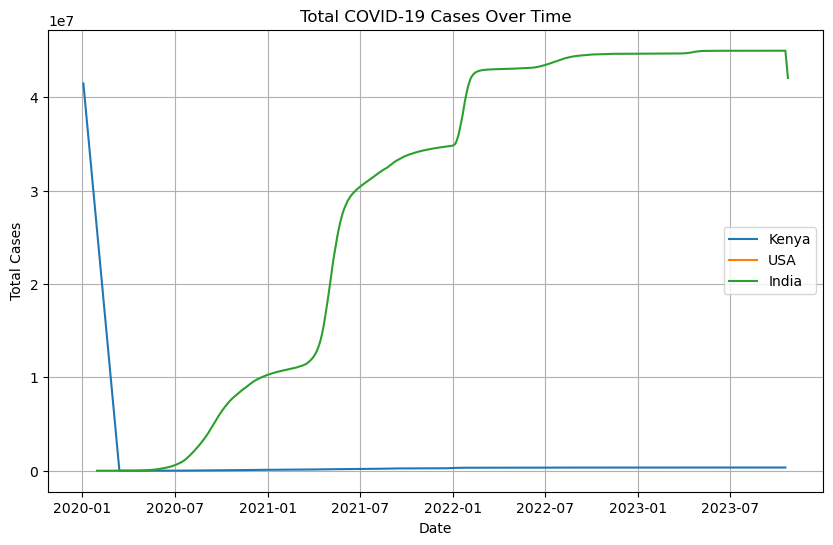

In [15]:
import matplotlib.pyplot as plt

# Plot total cases over time for each country
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases Over Time')
plt.legend()
plt.grid(True)
plt.show()


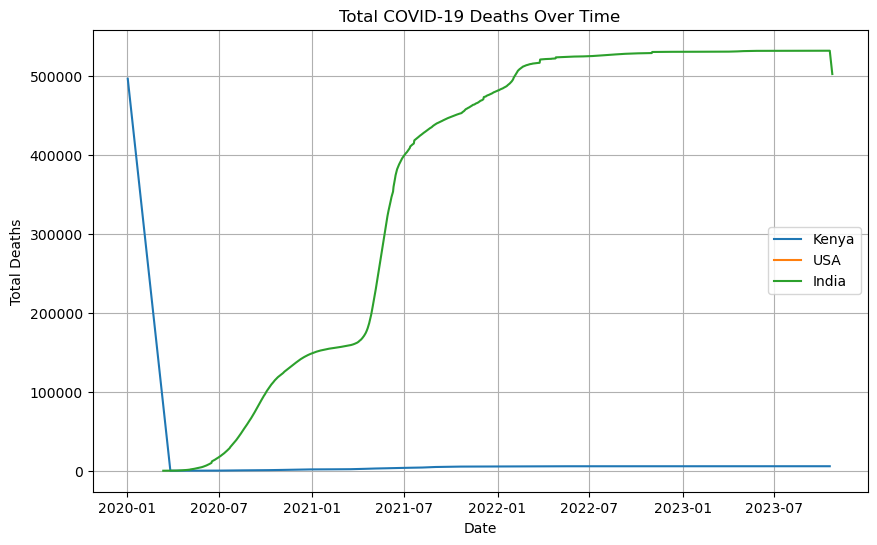

In [9]:
# Plot total deaths over time for each country
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.title('Total COVID-19 Deaths Over Time')
plt.legend()
plt.grid(True)
plt.show()


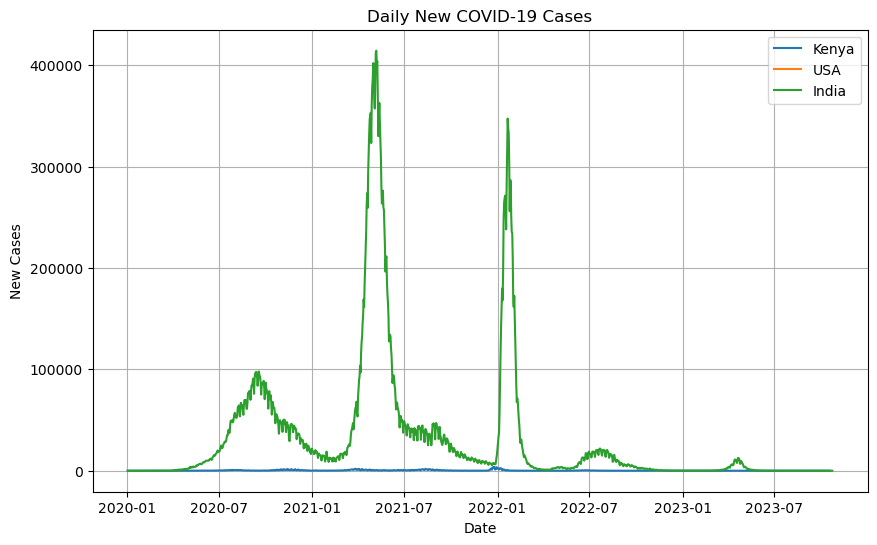

In [10]:
# Plot daily new cases for each country
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('Daily New COVID-19 Cases')
plt.legend()
plt.grid(True)
plt.show()


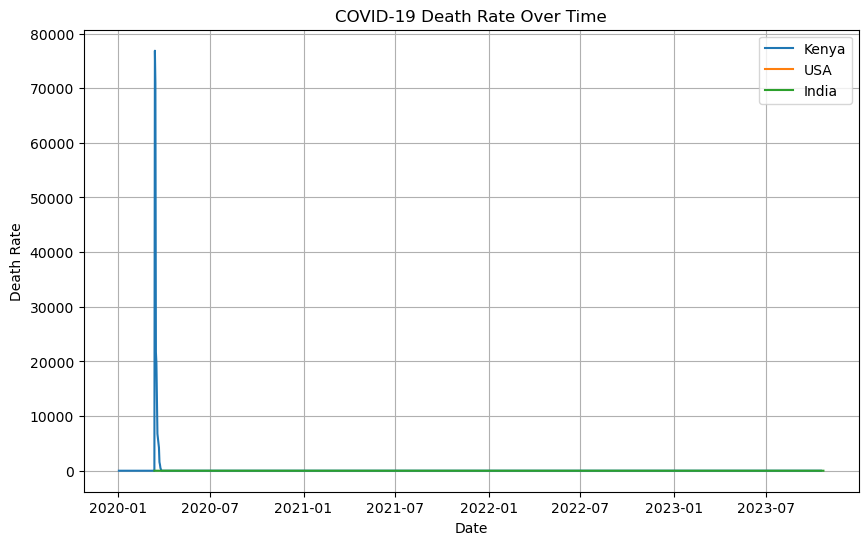

In [11]:
# Calculate the death rate
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']

# Plot death rate
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], label=country)
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.title('COVID-19 Death Rate Over Time')
plt.legend()
plt.grid(True)
plt.show()


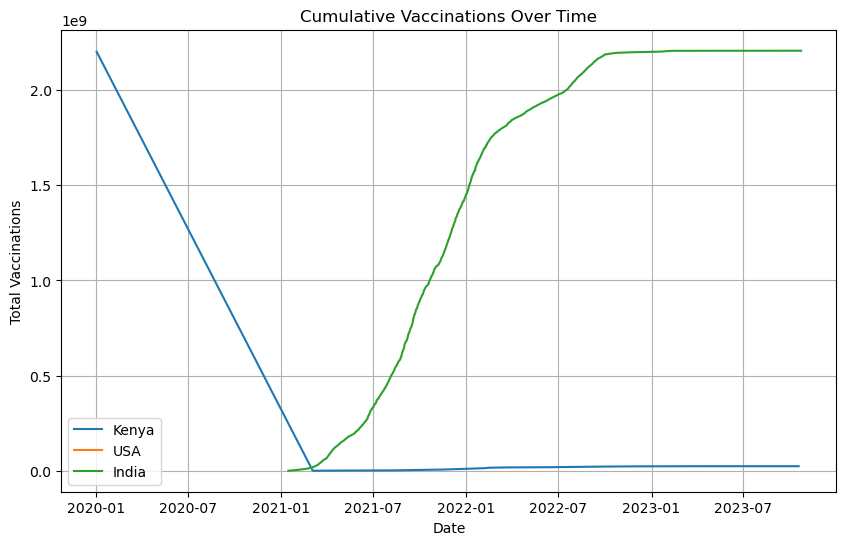

In [12]:
# Plot cumulative vaccinations over time for each country
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.title('Cumulative Vaccinations Over Time')
plt.legend()
plt.grid(True)
plt.show()


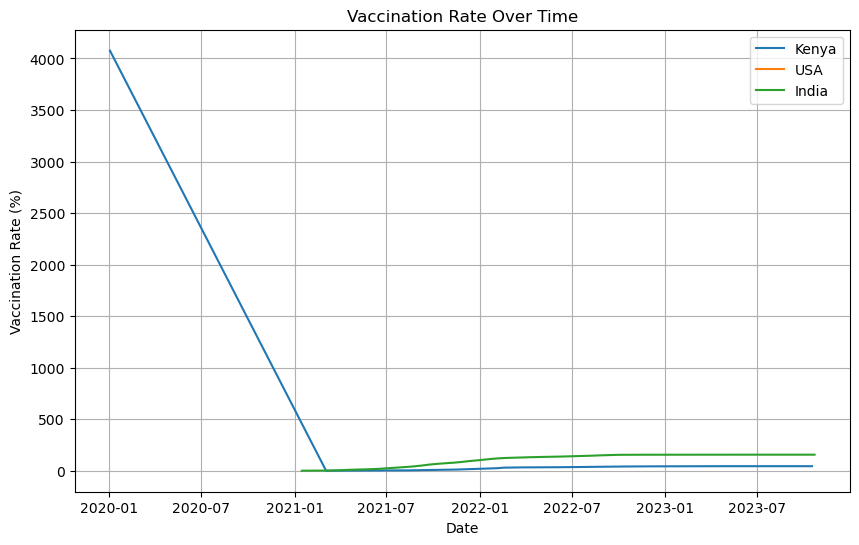

In [13]:
# Calculate vaccination rate for each country
df_filtered['vaccination_rate'] = df_filtered['total_vaccinations'] / df_filtered['population'] * 100

# Plot vaccination rate comparison
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['vaccination_rate'], label=country)
plt.xlabel('Date')
plt.ylabel('Vaccination Rate (%)')
plt.title('Vaccination Rate Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# 📊 COVID-19 Global Data Tracker

---

## 🧾 Project Overview

This project analyzes the global trends of the COVID-19 pandemic using real-world data sourced from the **Our World in Data** dataset. The analysis focuses on three countries — **Kenya**, **India**, and the **USA** — to explore time-based trends in total cases, deaths, and vaccination progress.

The goal is to uncover insights into the spread, impact, and control of COVID-19, and present these insights in a clean, narrative-driven format suitable for stakeholders, presentations, or public consumption.

---

## 🌍 Countries Analyzed

- **United States of America (USA)**
- **India**
- **Kenya**

These countries were selected to reflect a variety of pandemic responses, health infrastructure levels, and vaccination rollouts.

---

## 🧠 Key Insights

### 1. 📈 Total COVID-19 Cases Over Time
- The **USA** reported the highest number of total COVID-19 cases, with notable peaks in early 2021.
- **India** experienced two sharp waves, with a dramatic increase in mid-2021.
- **Kenya**, while having fewer total cases, showed a steady increase over time with fewer sharp peaks.

### 2. 💀 Total Deaths and Death Rate
- The **USA** also had the highest total deaths, reflecting both its case count and early struggle with the virus.
- **India** saw a major spike in deaths during the second wave, though it later improved post-vaccination.
- **Kenya** maintained a comparatively low death rate throughout the pandemic, possibly due to demographic and early-response factors.

### 3. 💉 Vaccination Progress
- **India** demonstrated a strong vaccination rollout, especially in mid to late 2021.
- The **USA** began vaccinations earlier, with rapid adoption, but plateaued after initial uptake.
- **Kenya** faced challenges in vaccine access early on but showed steady growth later in the timeline.

---

## 🧹 Data Cleaning Summary

- Converted date strings to `datetime` format.
- Removed rows with missing or incomplete data in critical columns like `total_cases`, `total_deaths`, and `total_vaccinations`.
- Used `fillna()` and interpolation methods to handle sparse data.
- Filtered the dataset to focus on Kenya, India, and USA for deeper analysis.

---

## 📅 Timeline Observations

- **Early 2020**: All three countries began reporting cases, with a slow rise.
- **Late 2020 to Early 2021**: Case numbers and deaths surged globally, especially in the USA.
- **Mid-2021**: Vaccination rollouts impacted trends, with declining new case counts in India and the USA.
- **Late 2021 onwards**: Fluctuations in cases continued due to new variants, but the death rate and severity showed a downward trend due to vaccine coverage.

---

## 🔚 Final Thoughts

- The **USA** struggled early with high transmission and deaths but benefited from early access to vaccines.
- **India** had a slower start with vaccination but made rapid progress after mid-2021.
- **Kenya**, while reporting lower numbers overall, presents a unique case for lower death rates despite resource constraints.

This project highlights the importance of early intervention, vaccine accessibility, and demographic factors in pandemic management. Data-driven insights like these help inform future public health strategies and emergency preparedness on a global scale.

---

## 📁 Data Source

- **Dataset**: [Our World in Data COVID-19 Dataset](https://ourworldindata.org/covid-cases)

---

